# Loading data 
The following paragraphs load data CSV files downloaded from RITA BTS website

In [1]:
import glob
import pandas as pd
path =r'/Users/eshjuna/Desktop/Misc/career/assignment_s' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
raw_data = frame


/Users/eshjuna/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Dataset [1]
The dataset consists of 9.09 million rows and 37 columns. This means that there were 9.09 million flights between 1 Jan 2015 to 31 July 2016. These flights belong to 14 airline companies and travelled between 323 airports within the US. 5061 tail numbers were used for 9.09 million flights. 

*The tail number is the aircraft registration number. Tail numbers are useful (among other things) for tracking private aircraft and non-scheduled charter flights. 

In [2]:
print raw_data.shape
for col in raw_data.columns:
    print col


(9098999, 37)
YEAR
QUARTER
MONTH
DAY_OF_MONTH
DAY_OF_WEEK
UNIQUE_CARRIER
AIRLINE_ID
TAIL_NUM
FL_NUM
ORIGIN
DEST
CRS_DEP_TIME
DEP_TIME
DEP_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
CRS_ARR_TIME
ARR_TIME
ARR_DELAY
CANCELLED
CANCELLATION_CODE
DIVERTED
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
FLIGHTS
DISTANCE
CARRIER_DELAY
WEATHER_DELAY
NAS_DELAY
SECURITY_DELAY
LATE_AIRCRAFT_DELAY
TOTAL_ADD_GTIME
LONGEST_ADD_GTIME
Unnamed: 36


# Carriers

In [3]:
print "Number of unique airline IDs:",len(raw_data["AIRLINE_ID"].unique())
print "Unique carriers:", raw_data["UNIQUE_CARRIER"].unique()
print "Number of unique tail numbers:", len(raw_data["TAIL_NUM"].unique())
print raw_data["TAIL_NUM"].head(5)
print raw_data["FL_NUM"].head(5)
print raw_data["FLIGHTS"].head(5)
print "Number of unique number of flights:", len(raw_data["FLIGHTS"].unique())

Number of unique airline IDs: 14
Unique carriers: ['UA' 'OO' 'US' 'VX' 'WN' 'AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'HA' 'MQ' 'NK']
Number of unique tail numbers: 5061
0    N768UA
1    N211UA
2    N469UA
3    N802UA
4    N529UA
Name: TAIL_NUM, dtype: object
0    218
1    219
2    220
3    220
4    221
Name: FL_NUM, dtype: int64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: FLIGHTS, dtype: float64
Number of unique number of flights: 1


# Airports

In [4]:
print "Number of unique origin airports:",len(raw_data["ORIGIN"].unique())
print "Number of unique destination airports:",len(raw_data["DEST"].unique())
print "Airport examples:", raw_data["ORIGIN"].head(5)

Number of unique origin airports: 323
Number of unique destination airports: 322
Airport examples: 0    HNL
1    ORD
2    ORD
3    PIT
4    IAD
Name: ORIGIN, dtype: object


# Performance 
The performance of flights can be analysed from three perspective:

    * Cancellations 
    * Time Delay 
    * Diversions

## Cancellations
There are total of 9.098 million flights during the 19 months out which 0.134 million flights cancelled. This makes cancellation rate of 1.4%. 54.1% of cancelled flights are cancelled due to weather. 28.2% flights are cancelled due to carrier, 17.5% due to NAS and only 0.01% due to the security reasons.

A => Carrier ; B => Weather ; C => NAS; D => Security

In [5]:
print "Total number of flights:", raw_data['CANCELLED'].count()
print "Normal and cancelled flights:"
print raw_data['CANCELLED'].value_counts()
print raw_data['CANCELLATION_CODE'].value_counts()
print raw_data['CANCELLATION_CODE'].value_counts()/134014


Total number of flights: 9098999
Normal and cancelled flights:
0.0    8964985
1.0     134014
Name: CANCELLED, dtype: int64
B    72504
A    37915
C    23571
D       24
Name: CANCELLATION_CODE, dtype: int64
B    0.541018
A    0.282918
C    0.175885
D    0.000179
Name: CANCELLATION_CODE, dtype: float64


# Cancellation ratio by time
Cancellation ratio is higher on Mondays (2.06%) as compared to the other days of week. The cancellation ratio is lowest on Fridays. January and February are the most risky months for traveling in terms of flight cancellations. The ratio of cancelled flights go over 3% in February. December, June and July are other candidates for most flight cancellations. Higher cancellations in January and February can be intuitively attributed to bad weather in these winter months. December, June and July are vacation and tourism periods.

Cancellations are also relatively higher at selected hours in a day, e.g., in the evenings between 18 to 21 when the cancellations are 1.8% or above. Similarly, cancellation ratio appears to be high at 2 am in the morning.

*How about reason for cancellations? Most frequent reason? (add it)


/Users/eshjuna/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


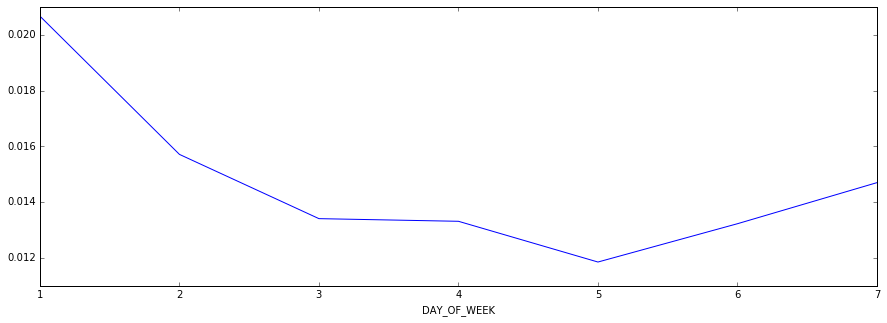

In [6]:
%matplotlib inline
raw_data.groupby('DAY_OF_WEEK')['CANCELLED'].agg("mean").plot(figsize=(15,5))

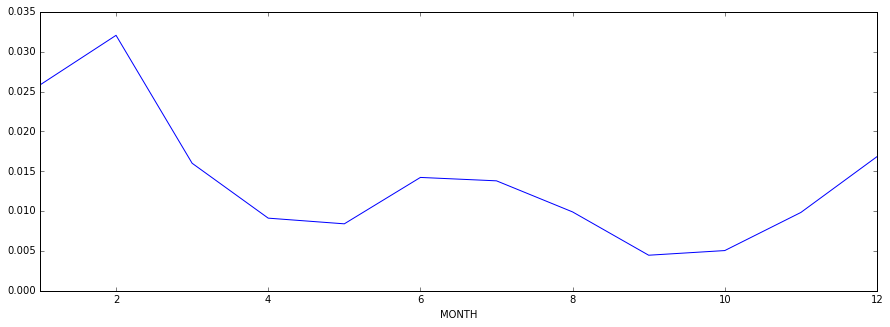

In [7]:
raw_data.groupby('MONTH')['CANCELLED'].agg("mean").plot(figsize=(15,5))

In [8]:
import numpy as np
raw_data["CRS_DEP_TIME_HOUR"] = (raw_data["CRS_DEP_TIME"]/100).apply(np.floor).astype(int)
raw_data["CRS_ARR_TIME_HOUR"] = (raw_data["CRS_ARR_TIME"]/100).apply(np.floor).astype(int)

In [9]:
raw_data[["CRS_DEP_TIME","CRS_DEP_TIME_HOUR","CRS_ARR_TIME","CRS_ARR_TIME_HOUR"]].head(10)

,CRS_DEP_TIME,CRS_DEP_TIME_HOUR,CRS_ARR_TIME,CRS_ARR_TIME_HOUR
0,1550,15,506,5
1,905,9,1309,13
2,2055,20,2347,23
3,1717,17,1755,17
4,823,8,927,9
5,2015,20,2316,23
6,1205,12,1709,17
7,900,9,1144,11
8,1805,18,1935,19
9,2059,20,2358,23


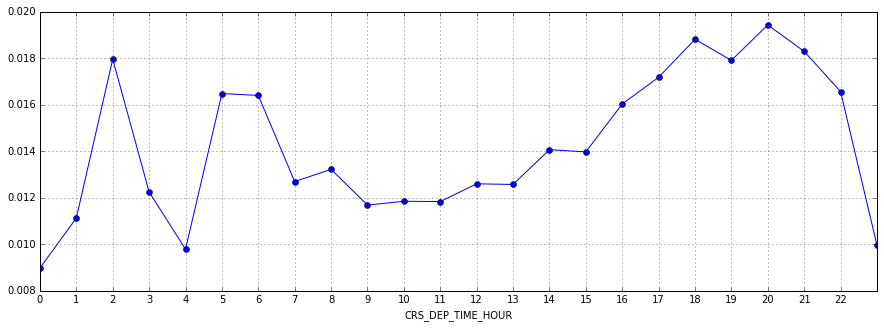

In [10]:
#raw_data.groupby('CRS_DEP_TIME_HOUR')['CANCELLED'].agg("mean").plot(figsize=(15,5))
raw_data.groupby('CRS_DEP_TIME_HOUR')['CANCELLED'].agg("mean").plot(grid=1, style='-o', xticks=np.arange(0,23,1), figsize=(15,5))


## Cancellation ratio by carrier
The cancellation ratio by carriers vary widely. From 5% to less than 0.4%.


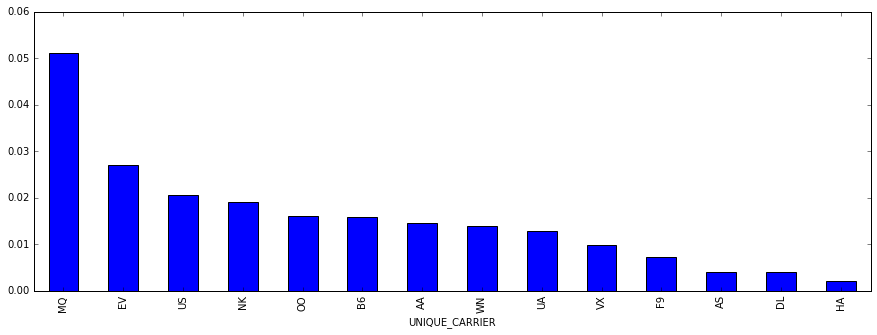

In [19]:
raw_data.groupby('UNIQUE_CARRIER')['CANCELLED'].agg("mean").sort_values(ascending=0).plot(kind = 'bar',figsize=(15,5))

## Cancellations by airport
There are 323 airports. The following bar plot shows top 20% airports by cancellation ratio. The cancellation ratio for these airports is above 2% and usually below 10%. However, the ratio is even above 15% for one airport (MMH). The potential reason behind high cancellation ratio could be that these airports are not very popular airports. Therefore generally there are very few airlines fly from these airports. Therefore, we need to look at the absolute number of cancelled flights. The number of cancelled flights show that popular airports are among the top airports by flight cancellations. ORD chicago airport is thus the worst among these. 

*It will be interesting to find the ratio of cancellations among airports with top number of cancellations.

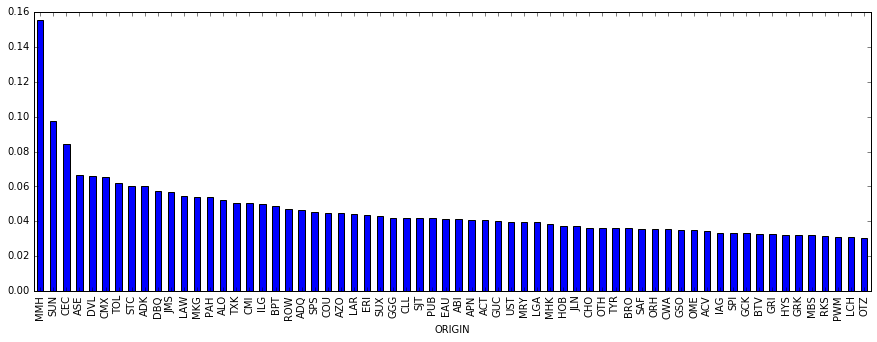

In [20]:
raw_data.groupby('ORIGIN')['CANCELLED'].agg("mean").sort_values(ascending=0)[:64].plot(kind = 'bar',figsize=(15,5))

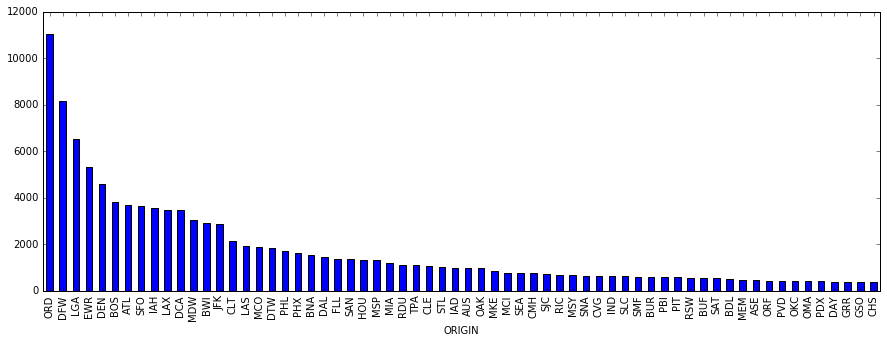

In [21]:
raw_data.groupby('ORIGIN')['CANCELLED'].agg("sum").sort_values(ascending=0)[:64].plot(kind = 'bar',figsize=(15,5))

In [22]:
temp = raw_data.groupby('ORIGIN')['CANCELLED'].value_counts()
temp

ORIGIN  CANCELLED
ABE     0.0           3836
        1.0             63
ABI     0.0           2452
        1.0            105
ABQ     0.0          31498
        1.0            328
ABR     0.0           1154
        1.0             14
ABY     0.0           1542
        1.0             10
ACK     0.0            848
        1.0             10
ACT     0.0           2534
        1.0            108
ACV     0.0           2181
        1.0             78
ACY     0.0           5954
        1.0            105
ADK     0.0            156
        1.0             10
ADQ     0.0            761
        1.0             37
AEX     0.0           4894
        1.0            118
AGS     0.0           4086
        1.0             28
AKN     0.0            120
ALB     0.0          13568
        1.0            180
ALO     0.0            639
                     ...  
TUL     1.0            348
TUS     0.0          25590
        1.0            265
TVC     0.0           4149
        1.0            126
TWF     0.

In [23]:
temp_2 = pd.DataFrame(temp)
temp_2 = temp_2.rename(columns={"CANCELLED":"COUNTS"}) 
temp_2 = temp_2.reset_index(level=['ORIGIN','CANCELLED'])
temp_2 = pd.pivot_table(temp_2,index=["ORIGIN"],columns=["CANCELLED"],values=["COUNTS"])


/Users/eshjuna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


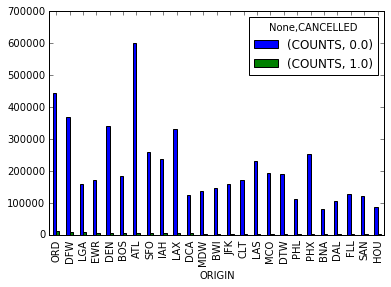

In [24]:
temp_2['COUNTS'][1] 
temp_2.sort([('COUNTS',1)], ascending=0)[:25].plot(kind="bar")

In [25]:
raw_data.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 36,CRS_DEP_TIME_HOUR,CRS_ARR_TIME_HOUR
0,2015,2,4,10,5,UA,19977,N768UA,218,HNL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5
1,2015,2,4,10,5,UA,19977,N211UA,219,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,13
2,2015,2,4,10,5,UA,19977,N469UA,220,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,23
3,2015,2,4,10,5,UA,19977,N802UA,220,PIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,17
4,2015,2,4,10,5,UA,19977,N529UA,221,IAD,...,13.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,8,9
5,2015,2,4,10,5,UA,19977,N481UA,222,EWR,...,130.0,0.0,0.0,0.0,0.0,40.0,40.0,NaN,20,23
6,2015,2,4,10,5,UA,19977,N433UA,222,SAT,...,0.0,0.0,2.0,0.0,35.0,NaN,NaN,NaN,12,17
7,2015,2,4,10,5,UA,19977,N440UA,224,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,11
8,2015,2,4,10,5,UA,19977,N831UA,226,MSP,...,0.0,0.0,36.0,0.0,0.0,NaN,NaN,NaN,18,19
9,2015,2,4,10,5,UA,19977,N845UA,226,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,23


In [26]:
temp_df = pd.DataFrame()
temp_df = raw_data.copy()
temp_df['YEAR_STR'] = raw_data['YEAR'].apply(str)
temp_df['MONTH_STR'] = raw_data['MONTH'].apply(str)
temp_df['DAY_STR'] = raw_data['DAY_OF_MONTH'].apply(str)
temp_df['CRS_DEP_TIME_HOUR_STR'] = raw_data['CRS_DEP_TIME_HOUR'].apply(str)
temp_df['DATE_TIME'] = temp_df["YEAR_STR"] + "/" + temp_df["MONTH_STR"] + "/" + temp_df["DAY_STR"] + ":"+ temp_df["CRS_DEP_TIME_HOUR_STR"]
temp_df['DATE_TIME'] =  pd.to_datetime(temp_df['DATE_TIME'], format='%Y/%m/%d:%H')
temp_df['EPOCH_TS'] = pd.DatetimeIndex(temp_df['DATE_TIME']).astype(np.int64)

In [27]:
print temp_df.shape
print raw_data.shape
raw_data['CRS_DEP_EPOCH__TS'] = temp_df['EPOCH_TS']/1000000000 # converting from nano-second to second
raw_data['CRS_DEP_DATE_TIME'] = temp_df['DATE_TIME']


(9098999, 45)
(9098999, 39)


In [28]:
raw_data.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 36,CRS_DEP_TIME_HOUR,CRS_ARR_TIME_HOUR,CRS_DEP_EPOCH__TS,CRS_DEP_DATE_TIME
0,2015,2,4,10,5,UA,19977,N768UA,218,HNL,...,NaN,NaN,NaN,NaN,NaN,NaN,15,5,1.428678e+09,2015-04-10 15:00:00
1,2015,2,4,10,5,UA,19977,N211UA,219,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,9,13,1.428656e+09,2015-04-10 09:00:00
2,2015,2,4,10,5,UA,19977,N469UA,220,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,20,23,1.428696e+09,2015-04-10 20:00:00
3,2015,2,4,10,5,UA,19977,N802UA,220,PIT,...,NaN,NaN,NaN,NaN,NaN,NaN,17,17,1.428685e+09,2015-04-10 17:00:00
4,2015,2,4,10,5,UA,19977,N529UA,221,IAD,...,28.0,0.0,0.0,NaN,NaN,NaN,8,9,1.428653e+09,2015-04-10 08:00:00


## Rough work 

In [81]:
temp_df_2 =  pd.DataFrame()
temp_df_2 = raw_data.copy()

In [64]:
temp_df_2.reset_index()
temp_df_2.index.is_unique

False

In [110]:
temp_df_2["CRS_DEP_EPOCH__TS"][:1000].apply(myTry)

,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,UST,VEL,VLD,VPS,WRG,XNA,YAK,YUM
0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN
1,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
8,0.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
9,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [109]:
def myTry(m):
    return temp_df_2[(temp_df_2["CRS_DEP_EPOCH__TS"]>=m-3600) & (temp_df_2["CRS_DEP_EPOCH__TS"]<m)].groupby("ORIGIN")["CANCELLED"].sum()

In [68]:
def f(x):
    ser = temp_df_2['DIVERTED'][(temp_df_2["CRS_DEP_DATE_TIME"] < x) & (temp_df_2["CRS_DEP_DATE_TIME"] >= x+pd.Timedelta(hours=-2))]
    return ser.sum()

In [73]:
def g(x):
    ser = first_100['DIVERTED'][(first_100["CRS_DEP_DATE_TIME"] < x) & (first_100["CRS_DEP_DATE_TIME"] >= x+pd.Timedelta(hours=-2))]
    return ser.sum()

In [79]:
#grouped = temp_df_2.groupby("UNIQUE_CARRIER")
#grouped.head(10)
first_100 = temp_df_2.iloc[:10000]
#first_100
windowed_grouped = first_100["CRS_DEP_DATE_TIME"].groupby(first_100["UNIQUE_CARRIER"]).apply(g) #.values()

ValueError: Series lengths must match to compare

In [80]:
windowed_grouped.head(5)

UNIQUE_CARRIER
UA    0
Name: CRS_DEP_DATE_TIME, dtype: int64

In [30]:
windows = temp_df_2['CANCELLED'][(temp_df_2["CRS_DEP_DATE_TIME"] >= temp_df_2['CRS_DEP_DATE_TIME'] + pd.Timedelta(hours=-2)) & (temp_df_2["CRS_DEP_DATE_TIME"] < temp_df_2["CRS_DEP_DATE_TIME"])]

In [32]:
windows.count()

0

In [3]:
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

In [ ]:
str1 = "select * from temp_df_2"
temp_df_3 = pdsql.sqldf(str1, globals())

In [ ]:
temp_df_3.show(5)

In [ ]:
temp_df.assign(rn=temp_df.sort_values(['DATE_TIME'], ascending=TRUE)
                                      .groupby(['ORIGIN'])
                .query('rn<'))

In [ ]:
tips.assign(rn=tips.sort_values(['total_bill'], ascending=False)
   ....:                     .groupby(['day'])
   ....:                     .cumcount() + 1)
   ....:      .query('rn < 3')
   ....:      .sort_values(['day','rn'])
   ....: )

In [3]:
u = temp_df['DATE_TIME'] + pd.Timedelta(hours=-2)

NameError: name 'temp_df' is not defined

In [182]:
for i in range(10):
    print temp_df['DATE_TIME'][i],u[i]

0   2015-04-10 15:00:00
0   2016-04-14 13:00:00
0   2015-08-29 09:00:00
0   2015-12-01 09:00:00
0   2015-02-01 09:00:00
0   2016-02-18 09:00:00
0   2015-01-06 06:00:00
0   2016-01-19 10:00:00
0   2015-07-17 17:00:00
0   2016-07-19 12:00:00
0   2015-06-01 09:00:00
0   2016-06-18 13:00:00
0   2015-03-24 10:00:00
0   2016-03-01 09:00:00
0   2015-05-18 08:00:00
0   2016-05-17 13:00:00
0   2015-11-04 08:00:00
0   2015-10-01 09:00:00
0   2015-09-01 09:00:00
Name: DATE_TIME, dtype: datetime64[ns] 0   2015-04-10 13:00:00
0   2016-04-14 11:00:00
0   2015-08-29 07:00:00
0   2015-12-01 07:00:00
0   2015-02-01 07:00:00
0   2016-02-18 07:00:00
0   2015-01-06 04:00:00
0   2016-01-19 08:00:00
0   2015-07-17 15:00:00
0   2016-07-19 10:00:00
0   2015-06-01 07:00:00
0   2016-06-18 11:00:00
0   2015-03-24 08:00:00
0   2016-03-01 07:00:00
0   2015-05-18 06:00:00
0   2016-05-17 11:00:00
0   2015-11-04 06:00:00
0   2015-10-01 07:00:00
0   2015-09-01 07:00:00
Name: DATE_TIME, dtype: datetime64[ns]
1   2015-0

In [74]:
features_rough = pd.DataFrame()
#features["UNIQUE_CARRIER"] = raw_data["UNIQUE_CARRIER"]

In [75]:
features_rough = raw_data.copy()

In [79]:
features_rough['MONTH_STR'] = features_rough['MONTH'].apply(str)

In [80]:
features_rough['YEAR_STR'] = features_rough['YEAR'].apply(str)

In [81]:
features_rough['DAY_STR'] = features_rough['DAY_OF_MONTH'].apply(str)

In [82]:
features_rough['CRS_DEP_HOUR_STR'] = features_rough['CRS_DEP_TIME_HOUR'].apply(str)

In [150]:
#del t
t = features_rough["YEAR_STR"] + "/" + features_rough["MONTH_STR"] + "/" + features_rough["DAY_STR"] + ":"+ features_rough["CRS_DEP_HOUR_STR"]

In [151]:
#del u
u =  pd.to_datetime(t, format='%Y/%m/%d:%H')
u

0        2015-04-10 15:00:00
1        2015-04-10 09:00:00
2        2015-04-10 20:00:00
3        2015-04-10 17:00:00
4        2015-04-10 08:00:00
5        2015-04-10 20:00:00
6        2015-04-10 12:00:00
7        2015-04-10 09:00:00
8        2015-04-10 18:00:00
9        2015-04-10 20:00:00
10       2015-04-10 10:00:00
11       2015-04-10 10:00:00
12       2015-04-10 08:00:00
13       2015-04-10 09:00:00
14       2015-04-10 16:00:00
15       2015-04-10 17:00:00
16       2015-04-10 17:00:00
17       2015-04-10 10:00:00
18       2015-04-10 11:00:00
19       2015-04-10 16:00:00
20       2015-04-10 06:00:00
21       2015-04-10 10:00:00
22       2015-04-10 17:00:00
23       2015-04-10 07:00:00
24       2015-04-10 11:00:00
25       2015-04-10 07:00:00
26       2015-04-10 06:00:00
27       2015-04-10 09:00:00
28       2015-04-10 05:00:00
29       2015-04-10 07:00:00
                 ...        
464916   2015-09-07 08:00:00
464917   2015-09-08 08:00:00
464918   2015-09-09 08:00:00
464919   2015-

In [ ]:
index = pd.DatetimeIndex(dates)

In [126]:
u

0        2015-04-10
1        2015-04-10
2        2015-04-10
3        2015-04-10
4        2015-04-10
5        2015-04-10
6        2015-04-10
7        2015-04-10
8        2015-04-10
9        2015-04-10
10       2015-04-10
11       2015-04-10
12       2015-04-10
13       2015-04-10
14       2015-04-10
15       2015-04-10
16       2015-04-10
17       2015-04-10
18       2015-04-10
19       2015-04-10
20       2015-04-10
21       2015-04-10
22       2015-04-10
23       2015-04-10
24       2015-04-10
25       2015-04-10
26       2015-04-10
27       2015-04-10
28       2015-04-10
29       2015-04-10
            ...    
464916   2015-09-07
464917   2015-09-08
464918   2015-09-09
464919   2015-09-10
464920   2015-09-11
464921   2015-09-12
464922   2015-09-13
464923   2015-09-14
464924   2015-09-15
464925   2015-09-16
464926   2015-09-17
464927   2015-09-18
464928   2015-09-19
464929   2015-09-20
464930   2015-09-21
464931   2015-09-22
464932   2015-09-23
464933   2015-09-24
464934   2015-09-25


In [152]:
index = pd.DatetimeIndex(u)

In [153]:
index

DatetimeIndex(['2015-04-10 15:00:00', '2015-04-10 09:00:00',
               '2015-04-10 20:00:00', '2015-04-10 17:00:00',
               '2015-04-10 08:00:00', '2015-04-10 20:00:00',
               '2015-04-10 12:00:00', '2015-04-10 09:00:00',
               '2015-04-10 18:00:00', '2015-04-10 20:00:00',
               ...
               '2015-09-27 08:00:00', '2015-09-28 08:00:00',
               '2015-09-29 08:00:00', '2015-09-30 08:00:00',
               '2015-09-01 20:00:00', '2015-09-02 20:00:00',
               '2015-09-03 20:00:00', '2015-09-04 20:00:00',
               '2015-09-05 20:00:00', '2015-09-06 20:00:00'],
              dtype='datetime64[ns]', length=9098999, freq=None)

In [162]:
index2 = index.astype(np.int64)
for i in range(10):
    print index[i],index2[i]

 2015-04-10 15:00:00 1428678000000000000
2015-04-10 09:00:00 1428656400000000000
2015-04-10 20:00:00 1428696000000000000
2015-04-10 17:00:00 1428685200000000000
2015-04-10 08:00:00 1428652800000000000
2015-04-10 20:00:00 1428696000000000000
2015-04-10 12:00:00 1428667200000000000
2015-04-10 09:00:00 1428656400000000000
2015-04-10 18:00:00 1428688800000000000
2015-04-10 20:00:00 1428696000000000000


In [1]:
import pandas as pd
with open('/Users/eshjuna/Desktop/Misc/career/assignment_s/flight_features_1_indexed_file.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
features_1 = pd.read_json(data_json_str)

KeyboardInterrupt: 

In [ ]:
features_1.head(5)

In [2]:
"""
Example script that scrapes data from the IEM ASOS download service
"""
import json
import datetime
import urllib2

# timestamps in UTC to request data for
startts = datetime.datetime(2015, 1, 1)
endts = datetime.datetime(2012, 1, 2)

SERVICE = "http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?"
SERVICE += "data=all&tz=Etc/UTC&format=comma&latlon=yes&"

SERVICE += startts.strftime('year1=%Y&month1=%m&day1=%d&')
SERVICE += endts.strftime('year2=%Y&month2=%m&day2=%d&')

states = """AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ME
 MI MN MO MS MT NC ND NE NH NJ NM NV NY OH OK OR PA RI SC SD TN TX UT VA VT
 WA WI WV WY"""
# IEM quirk to have Iowa AWOS sites in its own labeled network
networks = ['AWOS']
for state in states.split():
    networks.append("%s_ASOS" % (state,))

for network in networks:
    # Get metadata
    uri = "http://mesonet.agron.iastate.edu/geojson/network.php?network=%s" % (
                                                                    network,)
    data = urllib2.urlopen(uri)
    jdict = json.load(data)
    for site in jdict['features']:
        faaid = site['properties']['sid']
        sitename = site['properties']['sname']
        uri = '%s&station=%s' % (SERVICE, faaid)
        print 'Network: %s Downloading: %s [%s]' % (network, sitename, faaid)
        data = urllib2.urlopen(uri)
        outfn = '%s_%s_%s.txt' % (faaid, startts.strftime("%Y%m%d%H%M"),
                                  endts.strftime("%Y%m%d%H%M"))
        out = open(outfn, 'w')
        out.write(data.read())
out.close()

Network: AWOS Downloading: ALGONA [AXA]
Network: AWOS Downloading: ANKENY [IKV]
Network: AWOS Downloading: ATLANTIC [AIO]
Network: AWOS Downloading: AUDUBON [ADU]
Network: AWOS Downloading: BOONE MUNI [BNW]
Network: AWOS Downloading: CARROLL [CIN]
Network: AWOS Downloading: Centerville [TVK]
Network: AWOS Downloading: CHARITON [CNC]
Network: AWOS Downloading: CHARLES CITY [CCY]
Network: AWOS Downloading: Cherokee [CKP]
Network: AWOS Downloading: CLARINDA [ICL]
Network: AWOS Downloading: CLARION [CAV]
Network: AWOS Downloading: CLINTON [CWI]
Network: AWOS Downloading: COUNCIL BLUFFS [CBF]
Network: AWOS Downloading: CRESTON [CSQ]
Network: AWOS Downloading: DECORAH [DEH]
Network: AWOS Downloading: DENISON [DNS]
Network: AWOS Downloading: FAIRFIELD [FFL]
Network: AWOS Downloading: Forest City [FXY]
Network: AWOS Downloading: FORT DODGE [FOD]
Network: AWOS Downloading: FORT MADISON [FSW]
Network: AWOS Downloading: Grinnell [GGI]
Network: AWOS Downloading: HARLAN [HNR]
Network: AWOS Download

KeyboardInterrupt: 

In [3]:
import openweather
from datetime import datetime

# create client
ow = openweather.OpenWeather()

# find weather stations near me
stations = ow.find_stations_near(
    41.9,  # longitude
    -87.9, # latitude
    100   # kilometer radius
)

# iterate results
for station in stations:
    print station

# get current weather at Cologne/Bonn airport
# (station id = 4885)
print ow.get_weather(4885)

# historic weather
start_date = datetime(2015, 01, 01)
end_date = datetime(2015, 01, 31)

# default: hourly interval
print ow.get_historic_weather(4885, start_date, end_date)

# daily aggregates
print ow.get_historic_weather(4885, start_date, end_date, "day")

OpenWeather.do_request(): No connection. (1. attempt)
OpenWeather.do_request(): No connection. (2. attempt)
OpenWeather.do_request(): No connection. (3. attempt)


TypeError: 'NoneType' object is not iterable